# Model Description

\begin{align}
H_{{\rm S}} & =\sum_{i}\overrightarrow{h_{i}}\cdot\overrightarrow{\sigma_{i}}+\sum_{ij\alpha\beta}A_{ij}\sigma_{i}^{\alpha}\sigma_{j}^{\beta},\\
\overrightarrow{\sigma_{i}} & =\left(\sigma_{i}^{x},\sigma_{i}^{y},\sigma_{i}^{z}\right),\\
\alpha,\beta & \in\left\{ x,y,z\right\} ,\\
\sigma_{i}^{x} & =\begin{pmatrix}0 & 1\\
1 & 0
\end{pmatrix},\\
\sigma_{i}^{y} & =\begin{pmatrix}0 & -{\rm i}\\
{\rm i} & 0
\end{pmatrix},\\
\sigma_{i}^{z} & =\begin{pmatrix}1 & 0\\
0 & -1
\end{pmatrix},\\
\mathcal{L} & \Rightarrow\sqrt{\gamma_{+}}\sigma_{i}^{+},\sqrt{\gamma_{-}}\sigma_{i}^{-},\sqrt{\gamma_{z}}\sigma_{i}^{z},\\
\sigma_{i}^{+} & =\begin{pmatrix}0 & 1\\
0 & 0
\end{pmatrix},\\
\sigma_{i}^{-} & =\begin{pmatrix}0 & 0\\
1 & 0
\end{pmatrix},\\
\sigma_{i}^{z} & =\begin{pmatrix}1 & 0\\
0 & -1
\end{pmatrix},\\
{\rm i}\frac{\partial\rho}{\partial t} & =\left[H,\rho\right]+\mathcal{L}\left[\rho\right],\\
\mathcal{L}\left[\rho\right] & =-\sum_{i,\eta}\gamma_{\eta}\left(\rho A_{\eta}^{\dagger i}A_{\eta}^{i}+A_{\eta}^{\dagger i}A_{\eta}^{i}\rho-2A_{\eta}^{i}\rho A_{\eta}^{\dagger i}\right),\\
A_{\eta}^{i} & =\sigma_{i}^{\eta},,\eta\!\in\!\left\{ +,-,z\right\} ,\\
\frac{\partial\rho}{\partial t} & =-{\rm i}\left[H_{{\rm S}},\rho\right]-\sum_{i,\eta}\gamma_{\eta}\left(\rho A_{\eta}^{\dagger i}A_{\eta}^{i}+A_{\eta}^{\dagger i}A_{\eta}^{i}\rho-2A_{\eta}^{i}\rho A_{\eta}^{\dagger i}\right)\\
 & =-{\rm i}\left[H_{{\rm S}},\rho\right]-\sum_{i,\eta}\gamma_{\eta}\left(\left\{ \rho,A_{\eta}^{\dagger i}A_{\eta}^{i}\right\} -2A_{\eta}^{i}\rho A_{\eta}^{\dagger i}\right),\\
A_{+}^{\dagger i}A_{+}^{i} & =\begin{pmatrix}0 & 1\\
0 & 0
\end{pmatrix}^{\dagger}\begin{pmatrix}0 & 1\\
0 & 0
\end{pmatrix}\\
 & =\begin{pmatrix}0 & 0\\
0 & 1
\end{pmatrix},\\
A_{-}^{\dagger i}A_{-}^{i} & =\begin{pmatrix}0 & 0\\
1 & 0
\end{pmatrix}^{\dagger}\begin{pmatrix}0 & 0\\
1 & 0
\end{pmatrix}\\
 & =\begin{pmatrix}1 & 0\\
0 & 0
\end{pmatrix},\\
A_{z}^{\dagger i}A_{z}^{i} & =\begin{pmatrix}1 & 0\\
0 & 1
\end{pmatrix},\\
\sum_{\eta}\gamma_{\eta}A_{\eta}^{\dagger i}A_{\eta}^{i} & =\begin{pmatrix}\gamma_{z}+\gamma_{-} & 0\\
0 & \gamma_{z}+\gamma_{+}
\end{pmatrix},\\
\frac{\partial\rho}{\partial t} & =-{\rm i}\left[H_{{\rm S}},\rho\right]-\sum_{i,\eta}\gamma_{\eta}\left\{ \rho,A_{\eta}^{\dagger i}A_{\eta}^{i}\right\} +2\sum_{i,\eta}\gamma_{\eta}A_{\eta}^{i}\rho A_{\eta}^{\dagger i}\\
 & =-{\rm i}\left[H_{{\rm S}},\rho\right]-\left\{ \rho,\sum_{i,\eta}\gamma_{\eta}A_{\eta}^{\dagger i}A_{\eta}^{i}\right\} +2\sum_{i,\eta}\gamma_{\eta}A_{\eta}^{i}\rho A_{\eta}^{\dagger i}\\
 & =-{\rm i}\left[H_{{\rm S}},\rho\right]-\left\{ \rho,\sum_{i}\begin{pmatrix}\gamma_{z}+\gamma_{-} & 0\\
0 & \gamma_{z}+\gamma_{+}
\end{pmatrix}_{i}\right\} +2\sum_{i,\eta}\gamma_{\eta}A_{\eta}^{i}\rho A_{\eta}^{\dagger i}
\end{align}

In [149]:
import numpy as np
import qutip.testing as qt
#qt.run()
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neupy import plots
import time
from sympy import *
from qutip import tensor

We construct at first the term $\Sigma_i\overrightarrow{h_{i}}\cdot\overrightarrow{\sigma_{i}}$.

0.040960073471069336


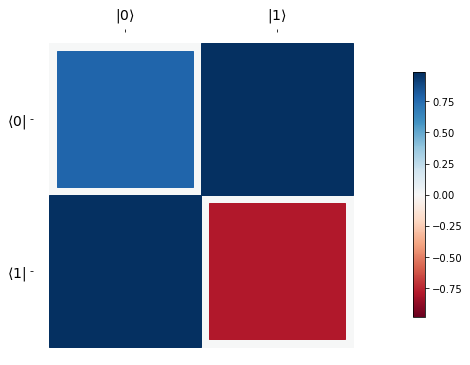

In [150]:
# Matrix of vectors Nx3. This will be set by the user.
Total_time=0
#--------------------------------------------------------------------------------------------

#code_block
N=1 #Number of spins to be considered starting from the position 0

#Matr_h=[[0,-1,0.2],[0.4,0.2,-0.1],[0.2,-0.4,0.1],[-1,1,1]]   #Matrix for N=4 shown as example

Matr_h=np.random.randn(N, 3) #The user can set this matrix which summarizes the vectors

#Vector form of Pauli matrices

def dot_arr_matr(f):
    return f[0]*sigmax()+f[1]*sigmay()+f[2]*sigmaz()

def Pauli(i):
    if i==1:
        return sigmax()
    elif i==2:
        return sigmay()
    elif i==3:
        return sigmaz()

#--------------------------------------------------------------------------------------------

# Matrix of vectors Nx3. This will be set by the user.

t0 = time.time()
#--------------------------------------------------------------------------------------------

# Independent hamiltonian of the system
H_ind=[]

for j in range(N):
    H_ind.append(dot_arr_matr(Matr_h[j])) 

H=tensor(H_ind)  


t1 = time.time()

hinton(H)

#--------------------------------------------------------------------------------------------


t2 = time.time()


Total_time=Total_time+t2-t0
print(t2-t0)

0.03800344467163086


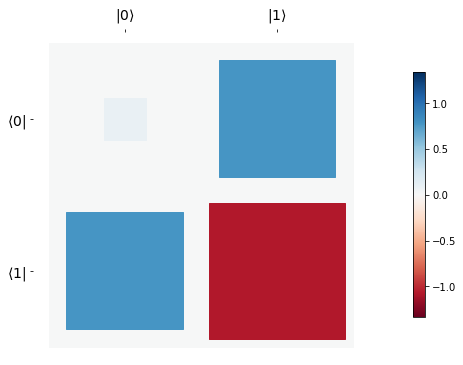

In [151]:
# Matrix of vectors Nx3. This will be set by the user.

t0 = time.time()
#--------------------------------------------------------------------------------------------



A=np.random.randn(N, N)  #The user can set also the interaction matrix which contains information of the interaction between the spins.
Sum_Pauli=Pauli(1)+Pauli(2)+Pauli(3)


System_inter=[]
for j in range(N): 
    System_inter.append(0*qeye(2)) 
    
def sum_ar(A,B):
    C=[]
    for j in range(N): 
        C.append(qeye(2)) 
    for j in range(len(A)):
        C[j]=A[j]+B[j]
    return C

    
    
def Contr_int(i,j):
    C=[]
    for j in range(N): 
        C.append(qeye(2))
    if i==j:    
        C[i]=3*qeye(2)
    elif i!=j:
        C[i]=Sum_Pauli
        C[j]=Sum_Pauli
    return C

for j in range(N):
    for i in range(N):
        System_inter=sum_ar(System_inter,np.multiply(Contr_int(i,j),A[i][j]))   
    #Actually to have a better visualization we can consider the application A---->A/(3*max(A))
        
Hint=tensor(System_inter)

t1 = time.time()

#--------------------------------------------------------------------------------------------

H=H+Hint  #System Hamiltonian
hinton(H)   #Uncomment to increase the code speed


t2 = time.time()


Total_time=Total_time+t2-t0

print(t2-t0)

In [152]:
#Generalized gamma operator

Gamma_coef=[0.2, 0.3, 0.1]  #User can set this feature
A_set=[Qobj([[0,1],[0,0]]),Qobj([[0,0],[1,0]]),Qobj([[1,0],[0,-1]])]


t0=time.time()
#---------------------------------------------------------------------------------


Gamma_matrix=Qobj([[Gamma_coef[2]+Gamma_coef[1],0],[0,Gamma_coef[2]+Gamma_coef[0]]])

def Gamma_i(i):
    C=[]
    for j in range(N): 
        C.append(qeye(2)) 
    C[i]=Gamma_matrix
    return C


Gamma_gen=0
for j in range(N):
    Gamma_gen=Gamma_gen+tensor(Gamma_i(j))
    
    
#-----------------------------------------------------------------------------------


t1=time.time()


Total_time=Total_time+t1-t0
print(t1-t0)

0.0019674301147460938


In the previous cell we constructed $\gamma_{{\rm gen}}=\sum_{i}\begin{pmatrix}\gamma_{z}+\gamma_{-} & 0\\
0 & \gamma_{z}+\gamma_{+}
\end{pmatrix}_{i},$

In [153]:
def A_oper(rho,i,eta):  #i goes from 0 to N-1 and j goes from 0 to 2
    C=[]
    for w in range(N): 
        C.append(qeye(2))    
    C[i]=A_set[eta]
    return Gamma_coef[eta]*(tensor(C).full())*rho*(np.transpose(np.conjugate(tensor(C))))

We constructed the term $\gamma_{\eta}A_{\eta}^{i}\rho A_{\eta}^{\dagger i}$ in the previous cell

In [154]:
def Density_matrix(N):
    Rho_list=[]
    for j in range((2**N)*(2**N)):
        w=symbols('rho'+str(j),real=True)
        Rho_list.append(w)#,real=True)
    Matr_Rho_Sup=Matrix(np.zeros((2**N, 2**N)))
    count=0
    for i in range(2**N):
        for j in range(0,i+1):
            if i==j:
                count=count+1
            else:
                Matr_Rho_Sup[(2**N)*i+j]=Rho_list[count]-1j*Rho_list[count+1]
                count=count+2
    Matr_Rho_Inf=Matrix(np.zeros((2**N, 2**N)))
    count=0
    for i in range(2**N):
        for j in range(0,i+1):
            if i==j:
                Matr_Rho_Inf[(2**N)*i+j]=Rho_list[count]
                count=count+1
            else:
                Matr_Rho_Inf[(2**N)*i+j]=Rho_list[count]+1j*Rho_list[count+1]
                count=count+2
    return Matr_Rho_Inf+transpose(Matr_Rho_Sup)

In [155]:
t0=time.time()
#---------------------------------------------------------------------------------
rho_sys=Density_matrix(N)

rho_central= np.zeros((2**N, 2**N))
for i in range(N):
    for eta in range(3):
        rho_central=rho_central+A_oper(rho_sys,i,eta)
        

#---------------------------------------------------------------------------------
t1=time.time()

Total_time=Total_time+t1-t0

print(t1-t0)        

0.012996196746826172


We constructed the term $\sum_{\eta,i}\gamma_{\eta}A_{\eta}^{i}\rho A_{\eta}^{\dagger i}$ in the previous cell for an explicit $\rho$. For solving the master equation we will come back to this function

In [156]:
t0=time.time()

RHS_me=-1j*(H*rho_sys-rho_sys*H)-(rho_sys*Gamma_gen+Gamma_gen*rho_sys)+2*rho_central

t1=time.time()

Total_time=Total_time+t1-t0
print(t1-t0)

0.027001380920410156


The previous cell generated using symbolic algebra the right hand side of the master equation given by:

$-{\rm i}\left[H_{{\rm S}},\rho\right]-\left\{ \rho,\sum_{i}\begin{pmatrix}\gamma_{z}+\gamma_{-} & 0\\
0 & \gamma_{z}+\gamma_{+}
\end{pmatrix}_{i}\right\} +2\sum_{i,\eta}\gamma_{\eta}A_{\eta}^{i}\rho A_{\eta}^{\dagger i},$

If we want we can visualize the real and imaginary parts of the previous expression, which could be used to solve the ODE via (re(RHS_me) and im(RHS_me))

In [157]:
Total_time   #Total time needed to prepare the Righ-hand-side of the master equation

0.12092852592468262

In [158]:
def Vectorization(Matr):
    Rho_vector=[]
    for j in range(2**N):
        for i in range(0,j+1):
            Rho_vector.append(Matr[(2**N)*j+i])
    return Rho_vector
  

    
def remove_zeros(A):
    C=[]
    for j in A:
        if j!=0:
            C.append(j)
    return C    

In [159]:
Rho_list=[]
for j in range((2**N)*(2**N)):
    w=symbols('rho'+str(j),real=True)
    Rho_list.append(w)#,real=True)

In [160]:
hu=remove_zeros(Vectorization(re(rho_sys))+Vectorization(im(rho_sys)))
rhshu=remove_zeros(Vectorization(re(RHS_me))+Vectorization(im(RHS_me)))

In [161]:
hu

[rho0, rho1, rho3, 1.0*rho2]

In [162]:
rhshu
            

[-0.6*rho0 - 1.84968604733656*rho1 + 0.659198039245831*rho2 + 0.4*rho3,
 0.924843023668278*rho0 - 0.9*rho1 - 1.45972679862947*rho2 - 0.924843023668278*rho3,
 0.6*rho0 + 1.84968604733656*rho1 - 0.659198039245831*rho2 - 0.4*rho3,
 -0.329599019622915*rho0 + 1.45972679862947*rho1 - 0.9*rho2 + 0.329599019622915*rho3]

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint



def f(y, t):
    [rho0, rho1, rho3, rho2]= y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    G=[-0.6*rho0 + 0.677102314650945*rho1 + 4.71053360760262*rho2 + 0.4*rho3,
 -0.338551157325473*rho0 - 0.9*rho1 - 1.94323155332333*rho2 + 0.338551157325473*rho3,
 0.6*rho0 - 0.677102314650945*rho1 - 4.71053360760262*rho2 - 0.4*rho3,
 -2.35526680380131*rho0 + 1.94323155332333*rho1 - 0.9*rho2 + 2.35526680380131*rho3]
    derivs =G
    return derivs

theta0 = 1     # initial angular displacement
omega0 = 0


y0 = [1,0,0,0]

params = [0, 0, 0]

tStop = 4000
tInc = 0.05
t = np.arange(0., tStop, tInc)


psoln = odeint(f, y0, t)

<ipython-input-164-31e4c2b8216e>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(311)
<ipython-input-164-31e4c2b8216e>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = fig.add_subplot(311)
<ipython-input-164-31e4c2b8216e>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

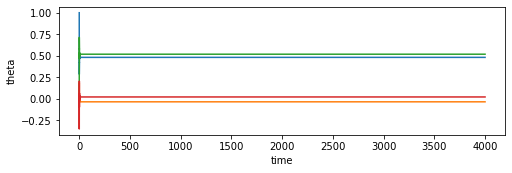

In [164]:
# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(311)
ax2.plot(t, psoln[:,1])


ax3 = fig.add_subplot(311)
ax3.plot(t, psoln[:,2])

ax4 = fig.add_subplot(311)
ax4.plot(t, psoln[:,3])

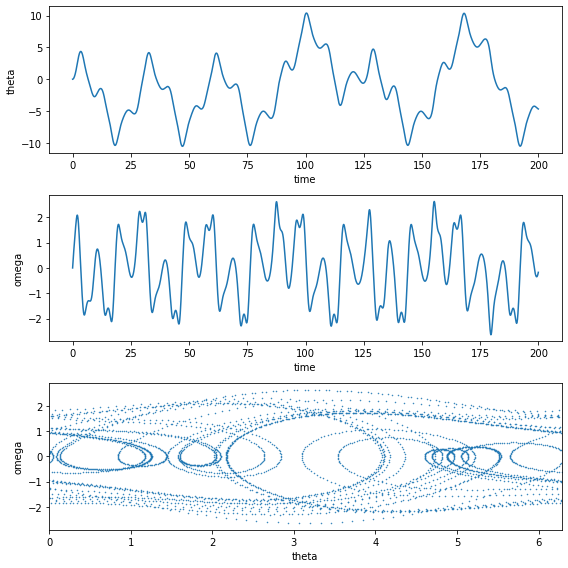

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

# Parameters
Q = 2.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Q, d, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 200.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()

In [166]:
Matr_h

array([[0.32959902, 0.92484302, 0.7298634 ]])

In [167]:
sigmax()*Matr_h[0][0]+sigmay()*Matr_h[0][1]+sigmaz()*Matr_h[0][2]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.7298634 +0.j          0.32959902-0.92484302j]
 [ 0.32959902+0.92484302j -0.7298634 +0.j        ]]

In [168]:
tensor(H_ind)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.7298634 +0.j          0.32959902-0.92484302j]
 [ 0.32959902+0.92484302j -0.7298634 +0.j        ]]

In [169]:
A

array([[-0.20123128]])

In [170]:
Hint

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.60369383  0.        ]
 [ 0.         -0.60369383]]

In [171]:
tensor(H_ind)  

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.7298634 +0.j          0.32959902-0.92484302j]
 [ 0.32959902+0.92484302j -0.7298634 +0.j        ]]

In [172]:
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.12616957+0.j          0.32959902-0.92484302j]
 [ 0.32959902+0.92484302j -1.33355723+0.j        ]]

In [173]:
Gamma_gen

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.4 0. ]
 [0.  0.3]]

In [174]:
rho_sys

Matrix([
[             rho0, rho1 - 1.0*I*rho2],
[rho1 + 1.0*I*rho2,              rho3]])

In [175]:
rho_central

Matrix([
[   0.1*rho0 + 0.2*rho3, -0.1*rho1 + 0.1*I*rho2],
[-0.1*rho1 - 0.1*I*rho2,    0.3*rho0 + 0.1*rho3]])

In [176]:
Gamma_coef

[0.2, 0.3, 0.1]

In [177]:
tensor(H_ind)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.7298634 +0.j          0.32959902-0.92484302j]
 [ 0.32959902+0.92484302j -0.7298634 +0.j        ]]

In [178]:
Hint

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.60369383  0.        ]
 [ 0.         -0.60369383]]

In [179]:
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.12616957+0.j          0.32959902-0.92484302j]
 [ 0.32959902+0.92484302j -1.33355723+0.j        ]]

In [180]:
Aui=-1j*(H*rho_sys-rho_sys*H)-(rho_sys*Gamma_gen+Gamma_gen*rho_sys)+2*rho_central

In [181]:
print(RHS_me==Aui)

True


In [183]:
Vectorization(Aui)

[-0.6*rho0 + 0.4*rho3 - 1.0*I*(-(0.329599019622915 + 0.924843023668278*I)*(rho1 - 1.0*I*rho2) + (0.329599019622915 - 0.924843023668278*I)*(rho1 + 1.0*I*rho2)),
 -0.9*rho1 - 0.9*I*rho2 - 1.0*I*(rho0*(0.329599019622915 + 0.924843023668278*I) - 1.45972679862947*rho1 - 1.45972679862947*I*rho2 - rho3*(0.329599019622915 + 0.924843023668278*I)),
 0.6*rho0 - 0.4*rho3 - 1.0*I*((0.329599019622915 + 0.924843023668278*I)*(rho1 - 1.0*I*rho2) - (0.329599019622915 - 0.924843023668278*I)*(rho1 + 1.0*I*rho2))]

In [ ]:
[-0.6*rho0 + 0.4*rho3 - 1.0*I*(-(0.329599019622915 + 0.924843023668278*I)*(rho1 - 1.0*I*rho2) + (0.329599019622915 - 0.924843023668278*I)*(rho1 + 1.0*I*rho2)),
 -0.9*rho1 - 0.9*I*rho2 - 1.0*I*(rho0*(0.329599019622915 + 0.924843023668278*I) - 1.45972679862947*rho1 - 1.45972679862947*I*rho2 - rho3*(0.329599019622915 + 0.924843023668278*I)),
 0.6*rho0 - 0.4*rho3 - 1.0*I*((0.329599019622915 + 0.924843023668278*I)*(rho1 - 1.0*I*rho2) - (0.329599019622915 - 0.924843023668278*I)*(rho1 + 1.0*I*rho2))]